In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Copy of Exercise Data.xlsx')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.dtypes

Inspection Year             int64
SECTION_LABEL              object
LANE                       object
CHAINAGE                    int64
RUTTING                   float64
LPV3M                     float64
LPV10M                    float64
TEXTURE                   float64
Works_Date         datetime64[ns]
dtype: object

In [ ]:
df.head()

,Inspection Year,SECTION_LABEL,LANE,CHAINAGE,RUTTING,LPV3M,LPV10M,TEXTURE,Works_Date
0,2020,2200M20/846,CL1,1500,11.756,0.529,1.664,0.885,1983-01-01
1,2020,2200M20/876,CL1,500,4.570,0.064,0.255,0.771,2015-08-11
2,2020,2200M20/876,CL1,600,6.315,0.069,0.267,0.794,2015-08-11
3,2020,2200M20/876,CL1,700,5.895,0.087,0.300,0.842,2015-08-11
4,2020,2200M20/876,CL1,800,3.713,0.151,0.576,0.742,2015-08-11


In [ ]:
#Quickly check measures i.e mean,median,std etc.
df.describe()

,Inspection Year,CHAINAGE,RUTTING,LPV3M,LPV10M,TEXTURE
count,15593.000000,15593.000000,15593.000000,15593.000000,15593.000000,15593.000000
mean,2020.987879,590.491567,7.443270,0.615228,1.143821,0.994758
std,0.817440,519.164676,6.438278,1.068365,1.340377,0.351676
min,2020.000000,0.000000,0.000000,0.000000,0.000000,0.136320
25%,2020.000000,200.000000,3.541000,0.228000,0.523000,0.740000
50%,2021.000000,500.000000,5.721300,0.355500,0.794000,0.957600
75%,2022.000000,900.000000,9.198000,0.587250,1.280000,1.209000
max,2022.000000,3100.000000,64.863160,12.404250,24.780000,2.700000


In [ ]:
#create function to calculate accp rutting
def accp_rutting(x):
        if x <= 6:
          return '5'
        if 6 < x <= 11:
          return '4'
        if 11 < x <= 15:
          return '3'
        if 15 < x <= 20:
          return '2'
        if  x > 20:
          return '1'

In [ ]:
#create function to calculate accp lvp3m
def accp_lvp3m(x):
        if x <= 0.7:
          return '5'
        if 0.7 < x <= 2.2:
          return '4'
        if 2.2 < x <= 3.3:
          return '3'
        if 3.3 < x <= 4.4:
          return '2'
        if  x > 4.4:
          return '1'

In [ ]:
#create function to calculate accp lvp10m
def accp_lvp10m(x):
        if x <= 1.6:
          return '5'
        if 1.6 < x <= 6.5:
          return '4'
        if 6.5 < x <= 10.6:
          return '3'
        if 10.6 < x <= 14.7:
          return '2'
        if  x > 14.7:
          return '1'

In [ ]:
#create function to calculate accp texture depth
def text_dep(x):
        if x >= 1.1:
          return '5'
        if 1.1 > x >= 0.8:
          return '4'
        if 0.8 > x >= 0.6:
          return '3'
        if 0.6 > x >= 0.4:
          return '2'
        if  x < 0.4:
          return '1'

In [ ]:
df['accp_rut'] = df.RUTTING.apply(accp_rutting)
df['accp_lvp3'] = df.LPV3M.apply(accp_lvp3m)
df['accp_lvp10'] = df.LPV10M.apply(accp_lvp10m)
df['accp_textdepth'] = df.LPV10M.apply(text_dep)

In [ ]:
#check if function is working correctly
df.head(3)

,Inspection Year,SECTION_LABEL,LANE,CHAINAGE,RUTTING,LPV3M,LPV10M,TEXTURE,Works_Date,accp_rut,accp_lvp3,accp_lvp10,accp_textdepth
0,2020,2200M20/846,CL1,1500,11.756,0.529,1.664,0.885,1983-01-01,3,5,4,5
1,2020,2200M20/876,CL1,500,4.570,0.064,0.255,0.771,2015-08-11,5,5,5,1
2,2020,2200M20/876,CL1,600,6.315,0.069,0.267,0.794,2015-08-11,4,5,5,1


In [ ]:
#to get see the unique values on lane column
df['LANE'].unique()

array(['CL1', 'CL3', 'CL2', 'CL4'], dtype=object)

In [ ]:
#to see the unique values on Inspection Year column
df['Inspection Year'].unique()

array([2020, 2021, 2022])

In [ ]:
#2020 data sectioned out for analysis
All_2020 = df[df["Inspection Year"] == 2020]

In [ ]:
Rutt_accp_2020 = All_2020.groupby('accp_rut')['accp_rut'].count()
Rutt_accp_2020

accp_rut
1      90
2      18
3      86
4     914
5    4197
Name: accp_rut, dtype: int64

In [ ]:
#2021 data sectioned out for analysis
All_2021 = df[df["Inspection Year"] == 2021]

In [ ]:
Rutt_accp_2021 = All_2021.groupby('accp_rut')['accp_rut'].count()
Rutt_accp_2021

accp_rut
1     132
2     115
3     418
4    1946
5    2561
Name: accp_rut, dtype: int64

In [ ]:
#2022 data sectioned out for analysis
All_2022 = df[df["Inspection Year"] == 2022]

In [ ]:
Rutt_accp_2022 = All_2022.groupby('accp_rut')['accp_rut'].count()
Rutt_accp_2022

accp_rut
1     465
2     588
3     857
4    1706
5    1500
Name: accp_rut, dtype: int64

<AxesSubplot:title={'center':'ACCP_RUTTING From 2020 to 2021'}, xlabel='accp_rut'>

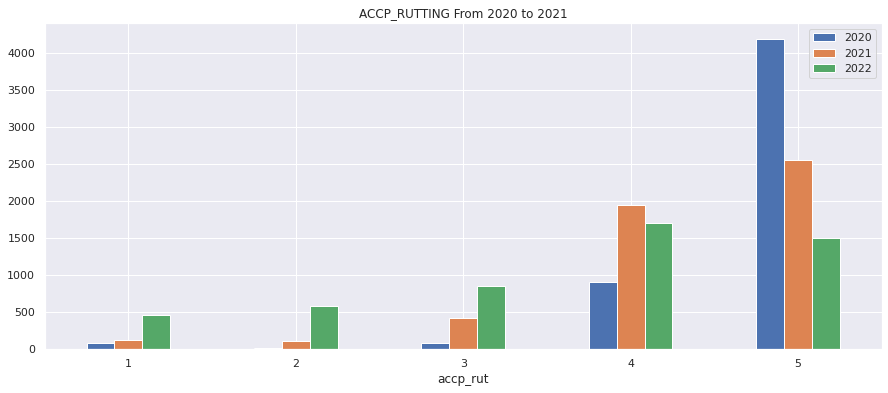

In [ ]:
#concat 2020 - 2022 rutt
rutt2020 =Rutt_accp_2020.to_frame(name = 2020)
rutt2021 =Rutt_accp_2021.to_frame(name = 2021)
rutt2022 =Rutt_accp_2022.to_frame(name = 2022)
rutt_accp_all =pd.concat([rutt2020,rutt2021,rutt2022],axis = 1 )
rutt_accp_all
rutt_accp_all.plot.bar(rot = 0,title = 'ACCP_RUTTING From 2020 to 2021')

In [ ]:
accp_lvp3_2020 = All_2020.groupby('accp_lvp3')['accp_lvp3'].count()
accp_lvp3_2020
accp_lvp3_2021 = All_2021.groupby('accp_lvp3')['accp_lvp3'].count()
accp_lvp3_2021
accp_lvp3_2022 = All_2022.groupby('accp_lvp3')['accp_lvp3'].count()
accp_lvp3_2022

accp_lvp3
1     137
2      17
3      74
4    1407
5    3481
Name: accp_lvp3, dtype: int64

,2020,2021,2022
accp_lvp3,,,
1,33,129,137
2,55,9,17
3,55,20,74
4,304,726,1407
5,4858,4288,3481


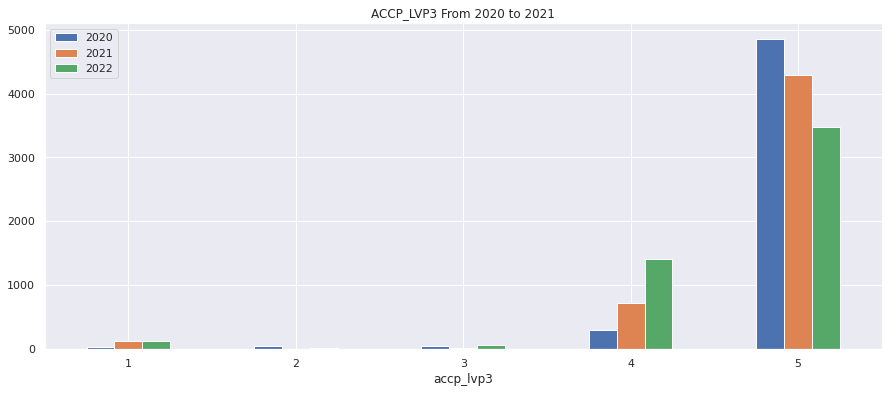

In [ ]:
#concat 2020 - 2022 lvp3
lvp3_2020 =accp_lvp3_2020.to_frame(name = 2020)
lvp3_2021 =accp_lvp3_2021.to_frame(name = 2021)
lvp3_2022 =accp_lvp3_2022.to_frame(name = 2022)
lvp3_accp_all =pd.concat([lvp3_2020,lvp3_2021,lvp3_2022],axis = 1 )
lvp3_accp_all.plot.bar(rot = 0,title = 'ACCP_LVP3 From 2020 to 2021')
lvp3_accp_all

In [ ]:
accp_lvp10_2020 = All_2020.groupby('accp_lvp10')['accp_lvp10'].count()
accp_lvp10_2020
accp_lvp10_2021 = All_2021.groupby('accp_lvp10')['accp_lvp10'].count()
accp_lvp10_2021
accp_lvp10_2022 = All_2022.groupby('accp_lvp10')['accp_lvp10'].count()
accp_lvp10_2022

accp_lvp10
1       7
2      10
3      29
4     964
5    4106
Name: accp_lvp10, dtype: int64

,2020,2021,2022
accp_lvp10,,,
1,21,6,7
2,7,8,10
3,118,25,29
4,574,892,964
5,4585,4241,4106


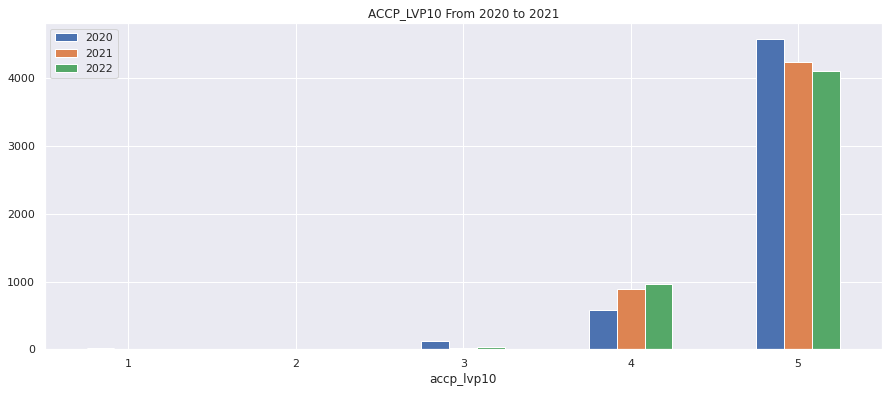

In [ ]:
#concat 2020 - 2022 lvp10,shows lvp10 yr on yr for each accp
lvp10_2020 =accp_lvp10_2020.to_frame(name = 2020)
lvp10_2021 =accp_lvp10_2021.to_frame(name = 2021)
lvp10_2022 =accp_lvp10_2022.to_frame(name = 2022)
lvp10_accp_all =pd.concat([lvp10_2020,lvp10_2021,lvp10_2022],axis = 1 )
lvp10_accp_all.plot.bar(rot = 0,title = 'ACCP_LVP10 From 2020 to 2021')
lvp10_accp_all

In [ ]:
#accp_textdepth
accp_textdepth_2020 = All_2020.groupby('accp_textdepth')['accp_textdepth'].count()
accp_textdepth_2020
accp_textdepth_2021 = All_2021.groupby('accp_textdepth')['accp_textdepth'].count()
accp_textdepth_2021
accp_textdepth_2022 = All_2022.groupby('accp_textdepth')['accp_textdepth'].count()
accp_textdepth_2022

accp_textdepth
1     600
2     910
3     894
4     918
5    1794
Name: accp_textdepth, dtype: int64

In [ ]:
accp_textdepth_2021

accp_textdepth
1     677
2     905
3     903
4     982
5    1705
Name: accp_textdepth, dtype: int64

,2020,2021,2022
accp_textdepth,,,
1,793,677,600
2,1208,905,910
3,945,903,894
4,952,982,918
5,1407,1705,1794


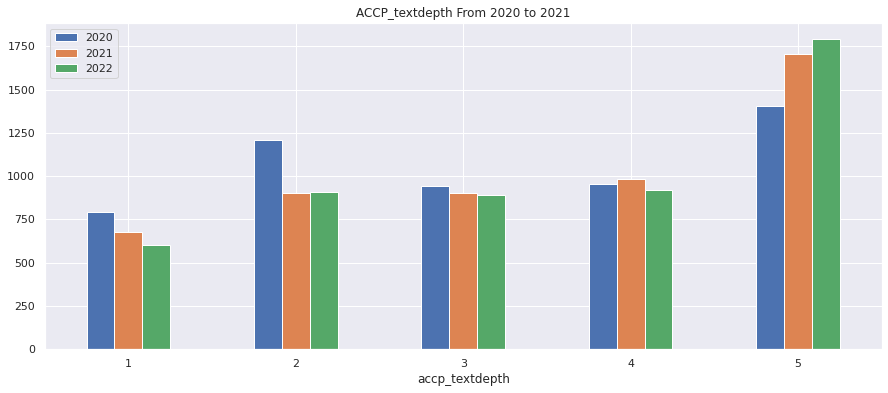

In [ ]:
#concat 2020 - 2022 textdepth,shows textdepth yr on yr accp
textdepth_2020 =accp_textdepth_2020.to_frame(name = 2020)
textdepth_2021 =accp_textdepth_2021.to_frame(name = 2021)
textdepth_2022 =accp_textdepth_2022.to_frame(name = 2022)
textdepth_accp_all =pd.concat([textdepth_2020,textdepth_2021,textdepth_2022],axis = 1 )
textdepth_accp_all.plot.bar(rot = 0,title = 'ACCP_textdepth From 2020 to 2021')
textdepth_accp_all

In [ ]:
#how different are ACCP scores for each lane
CL1 = df[df['LANE']=='CL1']
CL1.groupby("Inspection Year")["Inspection Year"].count()

Inspection Year
2020    2056
2021    1996
2022    1961
Name: Inspection Year, dtype: int64

In [ ]:
CL1.groupby(["Inspection Year","accp_rut"])["Inspection Year"].count()

Inspection Year  accp_rut
2020             1             38
                 2             11
                 3             44
                 4            552
                 5           1411
2021             1             73
                 2             76
                 3            337
                 4            981
                 5            529
2022             1            356
                 2            493
                 3            472
                 4            458
                 5            182
Name: Inspection Year, dtype: int64

In [ ]:
#lane cl1 2020
cl1_2020 = df[(df['LANE']=='CL1') & (df["Inspection Year"] == 2020)]
accprutcli2020 = cl1_2020.groupby("accp_rut")["accp_rut"].count().to_frame()
accprutcli2020. rename(columns={"accp_rut" : "2020"},inplace=True)
accprutcli2020

,2020
accp_rut,
1,38
2,11
3,44
4,552
5,1411


In [ ]:
#lane cl1 2021
cl1_2021 = df[(df['LANE']=='CL1') & (df["Inspection Year"] == 2021)]
accprutcli2021 = cl1_2021.groupby("accp_rut")["accp_rut"].count().to_frame()
accprutcli2021. rename(columns={"accp_rut" : "2021"},inplace=True)
accprutcli2021

,2021
accp_rut,
1,73
2,76
3,337
4,981
5,529


In [ ]:
#lane cl1 2022
cl1_2022 = df[(df['LANE']=='CL1') & (df["Inspection Year"] == 2022)]
accprutcli2022 = cl1_2022.groupby("accp_rut")["accp_rut"].count().to_frame()
accprutcli2022. rename(columns={"accp_rut" : "2022"},inplace=True)
accprutcli2022

,2022
accp_rut,
1,356
2,493
3,472
4,458
5,182


In [ ]:
cliaccpall =pd.concat([accprutcli2020,accprutcli2021,accprutcli2022],axis = 1 )
cliaccpall

,2020,2021,2022
accp_rut,,,
1,38,73,356
2,11,76,493
3,44,337,472
4,552,981,458
5,1411,529,182


<AxesSubplot:title={'center':'cl1 From 2020 to 2021'}, xlabel='accp_rut'>

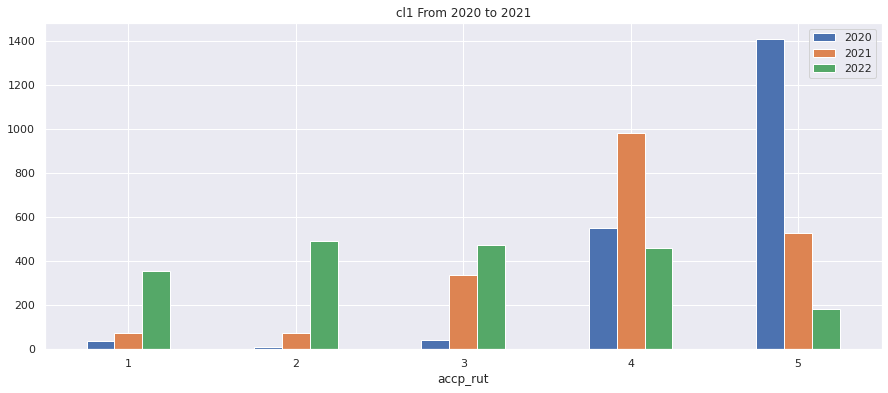

In [ ]:
#shows the lane cl1 developement yr on yr,same can be replicated for different lanes.
cliaccpall.plot.bar(rot = 0,title = 'cl1 From 2020 to 2021')

In [ ]:
df.head(3)

,Inspection Year,SECTION_LABEL,LANE,CHAINAGE,RUTTING,LPV3M,LPV10M,TEXTURE,Works_Date,accp_rut,accp_lvp3,accp_lvp10,accp_textdepth
0,2020,2200M20/846,CL1,1500,11.756,0.529,1.664,0.885,1983-01-01,3,5,4,5
1,2020,2200M20/876,CL1,500,4.570,0.064,0.255,0.771,2015-08-11,5,5,5,1
2,2020,2200M20/876,CL1,600,6.315,0.069,0.267,0.794,2015-08-11,4,5,5,1


In [ ]:
#lane cl1 2020 for accp_lvp3
cl1_2020 = df[(df['LANE']=='CL1') & (df["Inspection Year"] == 2020)]
accp_lvp3_cli2020 = cl1_2020.groupby("accp_lvp3")["accp_lvp3"].count().to_frame()
accp_lvp3_cli2020 . rename(columns={"accp_lvp3" : "2020"},inplace=True)
accp_lvp3_cli2020 

,2020
accp_lvp3,
1,12
2,21
3,31
4,139
5,1853


In [ ]:
#lane cl1 2021 for accp_lvp3
cl1_2021 = df[(df['LANE']=='CL1') & (df["Inspection Year"] == 2021)]
accp_lvp3_cli2021 = cl1_2021.groupby("accp_lvp3")["accp_lvp3"].count().to_frame()
accp_lvp3_cli2021 . rename(columns={"accp_lvp3" : "2021"},inplace=True)
accp_lvp3_cli2021

,2021
accp_lvp3,
1,56
2,4
3,12
4,264
5,1660


In [ ]:
#lane cl1 2022 for accp_lvp3
cl1_2022 = df[(df['LANE']=='CL1') & (df["Inspection Year"] == 2022)]
accp_lvp3_cli2022 = cl1_2022.groupby("accp_lvp3")["accp_lvp3"].count().to_frame()
accp_lvp3_cli2022 . rename(columns={"accp_lvp3" : "2022"},inplace=True)
accp_lvp3_cli2022

,2022
accp_lvp3,
1,59
2,9
3,42
4,449
5,1402


In [ ]:
cliaccpall_lvp3 =pd.concat([accp_lvp3_cli2020 ,accp_lvp3_cli2021,accp_lvp3_cli2022],axis = 1 )
cliaccpall_lvp3

,2020,2021,2022
accp_lvp3,,,
1,12,56,59
2,21,4,9
3,31,12,42
4,139,264,449
5,1853,1660,1402


<AxesSubplot:title={'center':'lvp3 cl1 From 2020 to 2021'}, xlabel='accp_lvp3'>

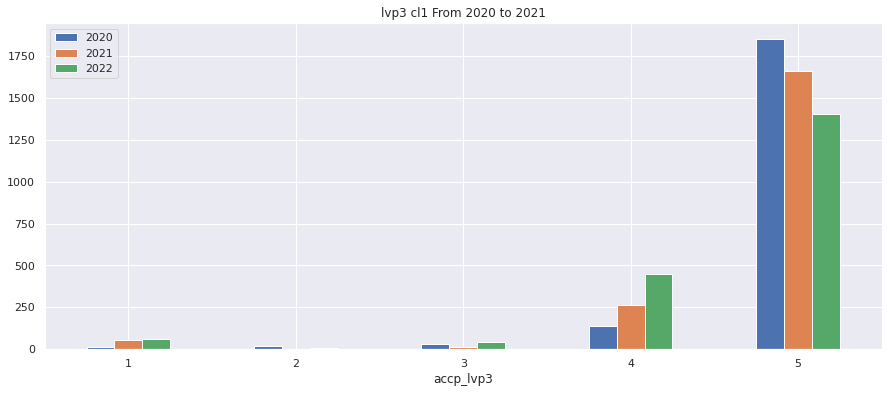

In [ ]:
cliaccpall_lvp3.plot.bar(rot = 0,title = 'lvp3 cl1 From 2020 to 2021')